In [1]:
import math # importe un package
import numpy as np # importe un package sous un nom particulier
from sklearn import linear_model # importe tout un module
import scipy
import matplotlib.pyplot as plt
import os
import pandas as pd
import urllib
import zipfile
import sys
import statsmodels.api as sm
import pylab as py
import seaborn as sns
np.random.seed(0)

### 1

In [117]:
df=pd.read_csv('invest.txt',sep = ' ')
print(df.info())
print("This dataframe is duplicated ? {}".format(df.duplicated().sum()))
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      15 non-null     int64  
 1   gnp       15 non-null     float64
 2   invest    15 non-null     float64
 3   cpi       15 non-null     float64
 4   interest  15 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 728.0 bytes
None
This dataframe is duplicated ? 0


,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### 2

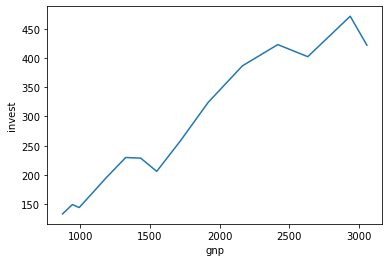

In [11]:
plt.plot(df['gnp'],df['invest'])
plt.xlabel('gnp')
plt.ylabel('invest')
plt.show()

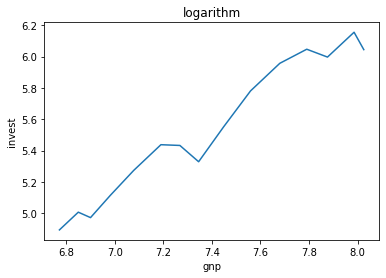

In [132]:
df_log = df.copy()
df_log['gnp'] = np.log(df['gnp'])
df_log['invest'] = np.log(df['invest'])

plt.plot(df_log['gnp'],df_log['invest'])
plt.xlabel('gnp')
plt.ylabel('invest')
plt.title('logarithm')
plt.show()

x = df_log['gnp']
y = df_log['invest']
xm = np.mean(x)
ym = np.mean(y)

### 3 
For the linear regression of Investment on GNP, estimate the intercept and the slope and their
standard deviations, as well as the determination coefficient for the ordinary least squares. Output
them in a readable form.

In [49]:
def slope_intercept(x,y):
    xm = np.mean(x)
    ym = np.mean(y)
    n = len(x)
    slope = np.sum((x - xm)*(y - ym)) / np.sum((x - xm)**2)
    intercept = ym - slope*xm
    sigma2 = 1/(n-2)* np.sum((y - (slope*x + intercept))**2)
    var_slope = sigma2 / np.sum((x - xm)**2)
    var_intercept = sigma2*(1/n + xm**2 / np.sum((x - xm)**2))
    R2 = np.sum(((slope*x + intercept) - ym)**2)/np.sum((y - ym)**2)
    return slope,intercept,np.sqrt(var_slope),np.sqrt(var_intercept),R2,np.sqrt(sigma2)

1.0152814015988707 -1.9635913352301815
0.05538306035485282 0.40954727166230825 0.9627572956057852


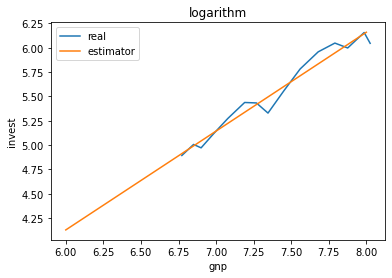

In [50]:

slope,intercept,std_dev_slope,std_dev_intercept,deter_coff,sigma= slope_intercept(x,y)
print(slope,intercept)
print(std_dev_slope,std_dev_intercept,deter_coff)

plt.plot(df_log['gnp'],df_log['invest'],label ='real')
plt.plot(range(6,9),range(6,9)*slope + intercept,label = 'estimator')
plt.xlabel('gnp')
plt.ylabel('invest')
plt.title('logarithm')
plt.legend()
plt.show()

### 4. 
Test the significance of the slope using the Student-t test. Report the value of the test statistic and
the p-value.

In [104]:
#slope
n = len(x)
p = 1
alpha = 0.05
x_obs  = (slope - 0)/std_dev_slope
p = 2* (1 - scipy.stats.t.cdf(x_obs,n-p-1))
print("p-value of slope",p)
if p < alpha:
    print("Reject H0")
print(x_obs)

p-value of slope 1.1363709973011282e-10
Reject H0
18.33198445686667


### 5. 
For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction
intervals for the 90% level.

In [107]:
alpha = 0.1
n = len(x)
quantile = scipy.stats.t.ppf(1-alpha/2,n-2)
print(quantile)

def CI(x_test):
    CI1 = intercept+slope*x_test-quantile*sigma*np.sqrt(1/n + (x_test-xm)**2/np.sum((x-xm)**2))
    CI2 = intercept+slope*x_test+quantile*sigma*np.sqrt(1/n + (x_test-xm)**2/np.sum((x-xm)**2))
    return [CI1,CI2]

def PI(x_test):
    PI1 = intercept+slope*x_test-quantile*sigma*np.sqrt(1+1/n + (x_test-xm)**2/np.sum((x-xm)**2))
    PI2 = intercept+slope*x_test+quantile*sigma*np.sqrt(1+1/n + (x_test-xm)**2/np.sum((x-xm)**2))
    return [PI1,PI2]

x_test = np.log(1000)
print(CI(x_test))
print(PI(x_test))
print(intercept + slope*x_test)
print(np.exp(intercept + slope*x_test))

1.7709333959867988
[4.9882228459711095, 5.111225406662492]
[4.88282002343868, 5.216628229194922]
5.049724126316801
155.9794279310548


In [87]:
x_test = np.log(1000)
new_x = np.append(x.to_numpy(),x_test)
new_y = np.append(y.to_numpy(),intercept + slope*x_test)

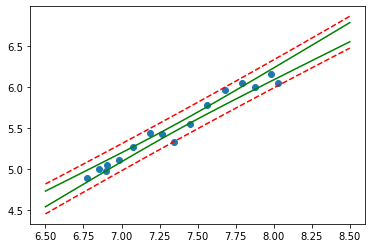

In [115]:
ci1 = []
ci2 = []
pi1 = []
pi2 = []
list_point = np.linspace(6.5,8.5,num = 50)
for i in list_point:
    ci1.append(CI(i)[0])
    ci2.append(CI(i)[1])
    pi1.append(PI(i)[0])
    pi2.append(PI(i)[1])



plt.scatter(new_x,new_y)
plt.plot(list_point, ci1,'g')
plt.plot(list_point, ci2,'g')
plt.plot(list_point, pi1,'r--')
plt.plot(list_point, pi2,'r--')

plt.show()


### 7. 
Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class LinearRegression() from
sklearn.linear_model is suggested but not obligatory ; any other available implementation of
the linear regression can be used instead. Report the estimated values and make sure that those
calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.

In [145]:
x_numpy = np.reshape(x.to_numpy(),(len(x),1))
y_numpy = np.reshape(y.to_numpy(),(len(x),1))
reg = linear_model.LinearRegression().fit(x_numpy,y_numpy)
print(reg.intercept_)
print(reg.coef_)


print(intercept)
print(slope)

[-1.96359134]
[[1.0152814]]
-1.9635913352301815
1.0152814015988707


### 8. 
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
regression line and the predicted point (in a different color). The graphic should coincide with the
corresponding elements from the one in Step 6.

In [149]:
reg.predict(np.reshape(x_test,(1,1)))

array([[5.04972413]])

Further, consider an additional explanatory variable, namely Interest (column “interest”, without a
logarithmic transform). In Steps 9–12, all the calculations should be done with elementary arithmetic and not involving existing libraries for running linear regression. (Use function inv from
numpy.linalg for inversion of a matrix (“ two-dimensional numpy-array) and function eig from
the same package for calculating its eigenvalues.)

###  9 
For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix.
Is it of full rank ?

In [210]:
x = df[['interest','gnp']]
y = df['invest']
n = len(x)
p = 2
x = x.to_numpy()
y = y.to_numpy()

x = np.hstack((np.ones((n,1)),x))
print(x)
Gram = x.T@x/n
print(Gram.shape)
print(np.linalg.matrix_rank(Gram))

[[1.0000e+00 5.1600e+00 8.7340e+02]
 [1.0000e+00 5.8700e+00 9.4400e+02]
 [1.0000e+00 5.9500e+00 9.9270e+02]
 [1.0000e+00 4.8800e+00 1.0776e+03]
 [1.0000e+00 4.5000e+00 1.1859e+03]
 [1.0000e+00 6.4400e+00 1.3264e+03]
 [1.0000e+00 7.8300e+00 1.4342e+03]
 [1.0000e+00 6.2500e+00 1.5492e+03]
 [1.0000e+00 5.5000e+00 1.7180e+03]
 [1.0000e+00 5.4600e+00 1.9183e+03]
 [1.0000e+00 7.4600e+00 2.1639e+03]
 [1.0000e+00 1.0280e+01 2.4178e+03]
 [1.0000e+00 1.1770e+01 2.6331e+03]
 [1.0000e+00 1.3420e+01 2.9377e+03]
 [1.0000e+00 1.1020e+01 3.0575e+03]]
(3, 3)
3


###  10
For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least
squares. Additionally, test significance of each coefficient using the Student-t test. Report the regression coefficients, corresponding to them p-values, and the determination coefficient in a readable
form. Discuss significance of the estimated regression coefficients.

In [217]:
coefficient = np.linalg.inv(x.T@x)@x.T@y
print(coefficient)

sigma2 = 1/(n-p-1)*np.sum((y - (coefficient[0]*x[:,0] +coefficient[1]*x[:,1]+coefficient[2]*x[:,2]))**2)
print(sigma2)
C = sigma2* np.linalg.inv(x.T@x)
print(C)

def p_value(x_obs,n,p):
    p_value = 2* (1 - scipy.stats.t.cdf(x_obs,n-p-1))
    return p_value


for i in range(len(coefficient)):
    x_obs = coefficient[i]/np.sqrt(C[i,i])
    print("p_value of parameter ",i,": ",p_value(x_obs,n,p))

[ 5.76465234 -0.46064225  0.15650676]
864.7318061149749
[[ 4.91841415e+02 -5.48954084e+01 -1.43399168e-02]
 [-5.48954084e+01  3.44176503e+01 -1.15293656e-01]
 [-1.43399168e-02 -1.15293656e-01  4.99577826e-04]]
p_value of parameter  0 :  0.7993220018626492
p_value of parameter  1 :  1.0612904283366116
p_value of parameter  2 :  1.4300363522457005e-05


In [221]:
def R2(coefficient, y):
    R2 = np.sum(((x@coefficient) - np.mean(y)*np.ones(n))**2)/np.sum((y - np.mean(y)*np.ones(n))**2)
    return R2
R2(coefficient,y)

0.946389747506162